In [ ]:
# Download the dataset
!gdown --id 1NZWMlrVLLFcpeUxIUK8b5gG3DZ0qN3C2
!unzip heart_attack.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NZWMlrVLLFcpeUxIUK8b5gG3DZ0qN3C2
To: /content/heart_attack.zip
100% 4.21k/4.21k [00:00<00:00, 6.71MB/s]


In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [168]:
ds = pd.read_csv('heart.csv')
print('Number of examples: ', len(ds))
ds.head()

Number of examples:  303


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Variables description

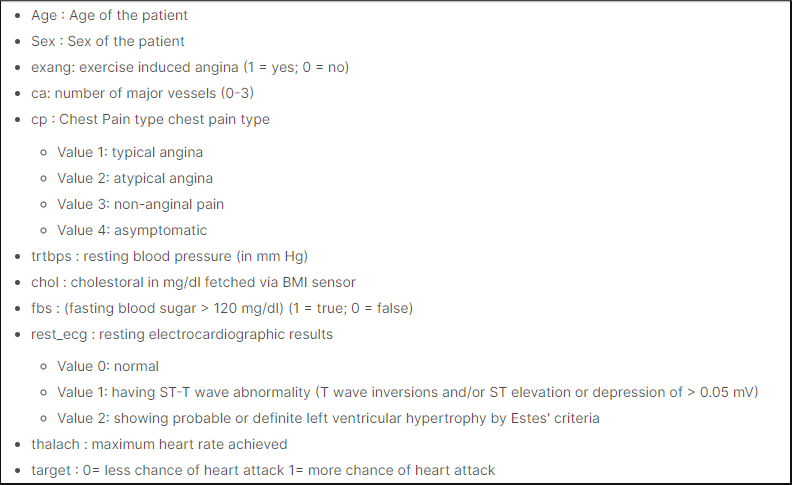

# Data preprocessing

In [204]:
continuous_cols = ['age', 'chol','oldpeak', 'thalachh', 'trtbps']
categorical_cols = ['cp', 'restecg']

def categoricalize(df, columns):
    for col in columns:
        dummy_values = pd.get_dummies(df[col])
        for v in dummy_values.columns:
            df = pd.concat([df, dummy_values[v].rename(f'{col}__{v}')], axis=1)
    return df.drop(columns=columns)

processed_ds = categoricalize(ds, categorical_cols)

for col in continuous_cols:
    processed_ds[col] = np.log1p(ds[col])

x, y = processed_ds.drop(columns=['output']), processed_ds['output']

x_train, x_test, y_train, y_test=train_test_split(x, y,
                                               test_size=0.2,
                                               random_state=2139) 


train_ds = x_train
test_ds = x_test

In [192]:
def compute_metrics(y_pred, y_gt):
    cm=confusion_matrix(y_gt,y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

    acc=accuracy_score(y_gt,y_pred)
    mse=mean_squared_error(y_gt,y_pred)
    precision, recall, fscore, train_support = score(y_gt, y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1: {} \nAccuracy: {} %\nMSE: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

def evaluate_model(model):
    model.fit(train_ds, y_train)
    y_pred = model.predict(test_ds)

    compute_metrics(y_pred, y_test)
    

# 1. Random forest

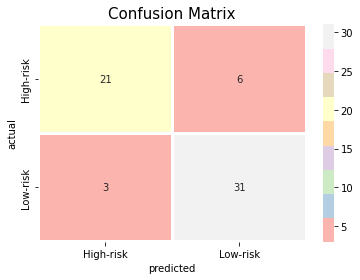

Precision: 0.838 
Recall: 0.912 
F1: 0.873 
Accuracy: 85.246 %
MSE: 0.148


In [193]:
rf_classifier = RandomForestClassifier(random_state=69)
evaluate_model(rf_classifier)

# 2. Logistic regression

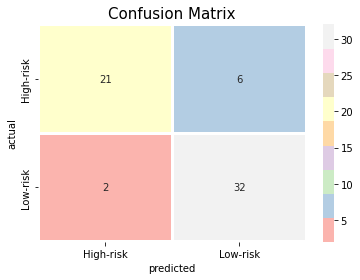

Precision: 0.842 
Recall: 0.941 
F1: 0.889 
Accuracy: 86.885 %
MSE: 0.131


In [194]:
logistic_reg = LogisticRegression(random_state=69, max_iter=1000)
evaluate_model(logistic_reg)

# 3. Decision tree

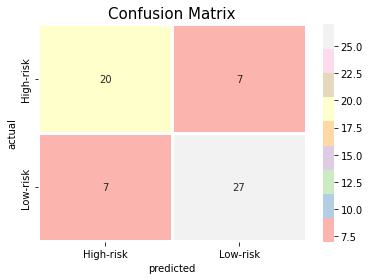

Precision: 0.794 
Recall: 0.794 
F1: 0.794 
Accuracy: 77.049 %
MSE: 0.23


In [203]:
decision_tree = DecisionTreeClassifier(random_state=69)
evaluate_model(decision_tree)

# Summary

We applied basic data preprocessing and compared 3 simple models - the best one turns out to be logistic regression, but random forest is pretty close.


All five metrics we measured have similar trend (are very correlated). 